# SPOTIFY HITS ANALYSIS

## Introduction
I have two datasets, one is 2019 top US 200 songs by day, the other one is the top 200 song's features of 2019. The objective is to see if there are clusters of the top hits based on their features and if in one of those clusters the top streamed songs are placed. 

## Libraries

Pandas\
Numpy\
Matplotlib\
Seaborn\
Plotly\
Cufflinks\
Sklearn KMeans

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import chart_studio.plotly as py
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
import plotly.express as px
print(__version__)

import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

pd.set_option('display.float_format', lambda x: '%.5f' % x)

4.7.1


## Datasets

streams -> Top 200 US streams per day on 2018 \
songs -> Songs features by Spotify

In [2]:
streams = pd.read_csv('1Top200us2019id.csv')
songs=pd.read_csv('1SpotifySongsFeatures2019.csv')

### Streams dataset

In [3]:
streams.head()

Rank                                          Track            Artist  \
0     1  Sunflower - Spider-Man: Into the Spider-Verse    by Post Malone   
1     2                                           Wow.    by Post Malone   
2     3                                     SICKO MODE   by Travis Scott   
3     4                                  thank u, next  by Ariana Grande   
4     5                        Going Bad (feat. Drake)      by Meek Mill   

     Streams        Date                                                 id  
0  1,867,789  01/01/2019  https://open.spotify.com/track/3KkXRkHbMCARz0a...  
1  1,564,946  01/01/2019  https://open.spotify.com/track/6MWtB6iiXyIwun0...  
2  1,454,622  01/01/2019  https://open.spotify.com/track/2xLMifQCjDGFmkH...  
3  1,397,512  01/01/2019  https://open.spotify.com/track/2rPE9A1vEgShuZx...  
4  1,245,437  01/01/2019  https://open.spotify.com/track/2IRZnDFmlqMuOrY...

### Songs dataset

In [4]:
songs.head()

Track         Artist  \
0  Sunflower - Spider-Man: Into the Spider-Verse    Post Malone   
1                                           Wow.    Post Malone   
2                                     SICKO MODE   Travis Scott   
3                                  thank u, next  Ariana Grande   
4                        Going Bad (feat. Drake)      Meek Mill   

                       id         V1  danceability  energy  key  loudness  \
0  3KkXRkHbMCARz0aVfEt68P  275441659       0.76000 0.47900    2  -5.57400   
1  6MWtB6iiXyIwun0YzU6DFP  240255598       0.83300 0.53900   11  -7.39900   
2  2xLMifQCjDGFmkHkpNLD9h  198222966       0.83400 0.73000    8  -3.71400   
3  2rPE9A1vEgShuZxxzR2tZH   41211441       0.72400 0.64700    1  -5.64200   
4  2IRZnDFmlqMuOrYOLnZZyc  242595435       0.88900 0.49600    4  -6.36500   

   mode  speechiness  ...  instrumentalness  liveness  valence     tempo  \
0     1      0.04660  ...           0.00000   0.07030  0.91300  89.91100   
1     0      0.17800  ...           0.00000   0.10100  0.38500  99.94700   
2     1      0.22200  ...           0.00000   0.12400  0.44600 155.00800   
3     1      0.06580  ...           0.00000   0.10200  0.43500 106.96000   
4     0      0.09050  ...           0.00000   0.25200  0.54400  86.00300   

             type                                   uri  \
0  audio_features  spotify:track:3KkXRkHbMCARz0aVfEt68P   
1  audio_features  spotify:track:6MWtB6iiXyIwun0YzU6DFP   
2  audio_features  spotify:track:2xLMifQCjDGFmkHkpNLD9h   
3  audio_features  spotify:track:2rPE9A1vEgShuZxxzR2tZH   
4  audio_features  spotify:track:2IRZnDFmlqMuOrYOLnZZyc   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/3KkXRkHbMCAR...   
1  https://api.spotify.com/v1/tracks/6MWtB6iiXyIw...   
2  https://api.spotify.com/v1/tracks/2xLMifQCjDGF...   
3  https://api.spotify.com/v1/tracks/2rPE9A1vEgSh...   
4  https://api.spotify.com/v1/tracks/2IRZnDFmlqMu...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/3KkX...      158040   
1  https://api.spotify.com/v1/audio-analysis/6MWt...      149520   
2  https://api.spotify.com/v1/audio-analysis/2xLM...      312820   
3  https://api.spotify.com/v1/audio-analysis/2rPE...      207333   
4  https://api.spotify.com/v1/audio-analysis/2IRZ...      180522   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4               4  

[5 rows x 21 columns]

## EDA Streams

In [5]:
streams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72800 entries, 0 to 72799
Data columns (total 6 columns):
Rank       72800 non-null int64
Track      72800 non-null object
Artist     72800 non-null object
Streams    72800 non-null object
Date       72800 non-null object
id         72800 non-null object
dtypes: int64(1), object(5)
memory usage: 3.3+ MB


### Observations
In Streams: \
Delete "by" in Artist \
Streams has to be numeric \
Date has to be date \
Delete the url in id

In [6]:
streams['Artist']=streams['Artist'].str[3:]

streams['Streams']= streams['Streams'].str.replace(',', '') 
streams['Streams']= pd.to_numeric(streams['Streams'], errors='coerce')

streams['Date']= pd.to_datetime(streams['Date'])

streams['id']= streams['id'].str.replace('https://open.spotify.com/track/', '') 


In [7]:
streams.head()

Rank                                          Track         Artist  \
0     1  Sunflower - Spider-Man: Into the Spider-Verse    Post Malone   
1     2                                           Wow.    Post Malone   
2     3                                     SICKO MODE   Travis Scott   
3     4                                  thank u, next  Ariana Grande   
4     5                        Going Bad (feat. Drake)      Meek Mill   

   Streams       Date                      id  
0  1867789 2019-01-01  3KkXRkHbMCARz0aVfEt68P  
1  1564946 2019-01-01  6MWtB6iiXyIwun0YzU6DFP  
2  1454622 2019-01-01  2xLMifQCjDGFmkHkpNLD9h  
3  1397512 2019-01-01  2rPE9A1vEgShuZxxzR2tZH  
4  1245437 2019-01-01  2IRZnDFmlqMuOrYOLnZZyc

In [8]:
streams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72800 entries, 0 to 72799
Data columns (total 6 columns):
Rank       72800 non-null int64
Track      72800 non-null object
Artist     72800 non-null object
Streams    72800 non-null int64
Date       72800 non-null datetime64[ns]
id         72800 non-null object
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 3.3+ MB


### Create a dataset of total streams per song

In [9]:
totalstreams=streams.copy()
totalstreams.drop(['Rank','Track','Artist','Date'], axis=1,inplace=True)
tsid=totalstreams.groupby('id').sum()
tsid.sort_values('Streams',ascending=False,inplace=True)

In [10]:
tsid.head()

Streams
id                               
2JvzF1RMd7lE3KmFlsyZD8  277363026
3KkXRkHbMCARz0aVfEt68P  275441659
2Fxmhks0bxGSBdJ92vM42m  266302864
2IRZnDFmlqMuOrYOLnZZyc  242595435
6MWtB6iiXyIwun0YzU6DFP  240255598

## EDA Songs

In [11]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2066 entries, 0 to 2065
Data columns (total 21 columns):
Track               2066 non-null object
Artist              2066 non-null object
id                  2066 non-null object
V1                  2066 non-null int64
danceability        2066 non-null float64
energy              2066 non-null float64
key                 2066 non-null int64
loudness            2066 non-null float64
mode                2066 non-null int64
speechiness         2066 non-null float64
acousticness        2066 non-null float64
instrumentalness    2066 non-null float64
liveness            2066 non-null float64
valence             2066 non-null float64
tempo               2066 non-null float64
type                2066 non-null object
uri                 2066 non-null object
track_href          2066 non-null object
analysis_url        2066 non-null object
duration_ms         2066 non-null int64
time_signature      2066 non-null int64
dtypes: float64(9), int64(5)

### Observations
In Songs:\
Delete unnecesary features\
(V1, type, uri, track_href, analysis_url)
Create a dataset with only songs features

In [12]:
songs.drop(['V1', 'type', 'uri', 'track_href', 'analysis_url'], axis=1, inplace=True)

In [13]:
songs.describe()

danceability     energy        key   loudness       mode  speechiness  \
count    2066.00000 2066.00000 2066.00000 2066.00000 2066.00000   2066.00000   
mean        0.67088    0.60499    5.20716   -6.80369    0.61859      0.14254   
std         0.15935    0.17519    3.65771    2.85925    0.48585      0.12751   
min         0.14800    0.01370    0.00000  -25.16600    0.00000      0.02290   
25%         0.56725    0.50200    1.00000   -7.96425    0.00000      0.04460   
50%         0.68700    0.62200    5.00000   -6.25700    1.00000      0.08500   
75%         0.78600    0.72900    8.00000   -4.93350    1.00000      0.21600   
max         0.97800    0.97800   11.00000   -1.33900    1.00000      0.93300   

       acousticness  instrumentalness   liveness    valence      tempo  \
count    2066.00000        2066.00000 2066.00000 2066.00000 2066.00000   
mean        0.25712           0.01684    0.17863    0.46569  121.84593   
std         0.26826           0.09699    0.13632    0.21625   30.69911   
min         0.00004           0.00000    0.02150    0.02620   46.71800   
25%         0.04235           0.00000    0.09970    0.29600   97.00500   
50%         0.15300           0.00000    0.12400    0.46000  120.09400   
75%         0.39700           0.00002    0.20400    0.62400  144.95625   
max         0.99400           0.95600    0.96300    0.98200  232.69000   

       duration_ms  time_signature  
count   2066.00000      2066.00000  
mean  199715.72168         3.94385  
std    58175.02043         0.38588  
min    30301.00000         1.00000  
25%   167789.25000         4.00000  
50%   194917.50000         4.00000  
75%   222533.00000         4.00000  
max   943529.00000         5.00000

In [14]:
songs.columns

Index(['Track', 'Artist', 'id', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [15]:
songs_ft=songs[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']]

In [16]:
songs_ft.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0       0.76000 0.47900    2  -5.57400     1      0.04660       0.55600   
1       0.83300 0.53900   11  -7.39900     0      0.17800       0.16300   
2       0.83400 0.73000    8  -3.71400     1      0.22200       0.00513   
3       0.72400 0.64700    1  -5.64200     1      0.06580       0.28000   
4       0.88900 0.49600    4  -6.36500     0      0.09050       0.25900   

   instrumentalness  liveness  valence     tempo  duration_ms  time_signature  
0           0.00000   0.07030  0.91300  89.91100       158040               4  
1           0.00000   0.10100  0.38500  99.94700       149520               4  
2           0.00000   0.12400  0.44600 155.00800       312820               4  
3           0.00000   0.10200  0.43500 106.96000       207333               4  
4           0.00000   0.25200  0.54400  86.00300       180522               4

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [18]:
scaler = StandardScaler()
scaler.fit(songs_ft)
scaled_songs_ft = scaler.transform(songs_ft)
songs_ft_scl = pd.DataFrame(scaled_songs_ft,columns=songs_ft.columns)
songs_ft_scl.describe()

danceability     energy        key   loudness       mode  speechiness  \
count    2066.00000 2066.00000 2066.00000 2066.00000 2066.00000   2066.00000   
mean       -0.00000   -0.00000    0.00000   -0.00000   -0.00000      0.00000   
std         1.00024    1.00024    1.00024    1.00024    1.00024      1.00024   
min        -3.28202   -3.37604   -1.42396   -6.42363   -1.27351     -0.93855   
25%        -0.65044   -0.58804   -1.15050   -0.40600   -1.27351     -0.76832   
50%         0.10121    0.09711   -0.05665    0.19125    0.78523     -0.45139   
75%         0.72262    0.70804    0.76373    0.65424    0.78523      0.57626   
max         1.92778    2.12974    1.58412    1.91170    0.78523      6.20092   

       acousticness  instrumentalness   liveness    valence      tempo  \
count    2066.00000        2066.00000 2066.00000 2066.00000 2066.00000   
mean       -0.00000          -0.00000    0.00000   -0.00000    0.00000   
std         1.00024           1.00024    1.00024    1.00024    1.00024   
min        -0.95857          -0.17364   -1.15293   -2.03287   -2.44783   
25%        -0.80080          -0.17364   -0.57913   -0.78491   -0.80937   
50%        -0.38824          -0.17364   -0.40083   -0.02633   -0.05708   
75%         0.52154          -0.17345    0.18618    0.73225    0.75298   
max         2.74750           9.68531    5.75540    2.38818    3.61154   

       duration_ms  time_signature  
count   2066.00000      2066.00000  
mean      -0.00000         0.00000  
std        1.00024         1.00024  
min       -2.91286        -7.63076  
25%       -0.54893         0.14554  
50%       -0.08250         0.14554  
75%        0.39231         0.14554  
max       12.78888         2.73764

In [19]:
mmscaler = MinMaxScaler(feature_range=(-1, 1))
mmscaler.fit(songs_ft_scl)
mmscaled_songs_ft = mmscaler.transform(songs_ft_scl)
songs_ft_mmscl = pd.DataFrame(mmscaled_songs_ft,columns=songs_ft.columns)


### Standardrize and Scale songs features

In [20]:
songs_ft_mmscl.describe()

danceability     energy        key   loudness       mode  speechiness  \
count    2066.00000 2066.00000 2066.00000 2066.00000 2066.00000   2066.00000   
mean        0.25994    0.22636   -0.05324    0.54130    0.23717     -0.73708   
std         0.38399    0.36334    0.66504    0.24000    0.97170      0.28020   
min        -1.00000   -1.00000   -1.00000   -1.00000   -1.00000     -1.00000   
25%         0.01024    0.01276   -0.81818    0.44389   -1.00000     -0.95231   
50%         0.29880    0.26164   -0.09091    0.58719    1.00000     -0.86353   
75%         0.53735    0.48356    0.45455    0.69828    1.00000     -0.57565   
max         1.00000    1.00000    1.00000    1.00000    1.00000      1.00000   

       acousticness  instrumentalness   liveness    valence      tempo  \
count    2066.00000        2066.00000 2066.00000 2066.00000 2066.00000   
mean       -0.48270          -0.96477   -0.66622   -0.08037   -0.19205   
std         0.53979           0.20291    0.28958    0.45249    0.33015   
min        -1.00000          -1.00000   -1.00000   -1.00000   -1.00000   
25%        -0.91486          -1.00000   -0.83388   -0.43545   -0.45920   
50%        -0.69222          -1.00000   -0.78226   -0.09228   -0.21089   
75%        -0.20125          -0.99996   -0.61232    0.25089    0.05648   
max         1.00000           1.00000    1.00000    1.00000    1.00000   

       duration_ms  time_signature  
count   2066.00000      2066.00000  
mean      -0.62898         0.47193  
std        0.12741         0.19294  
min       -1.00000        -1.00000  
25%       -0.69890         0.50000  
50%       -0.63948         0.50000  
75%       -0.57901         0.50000  
max        1.00000         1.00000

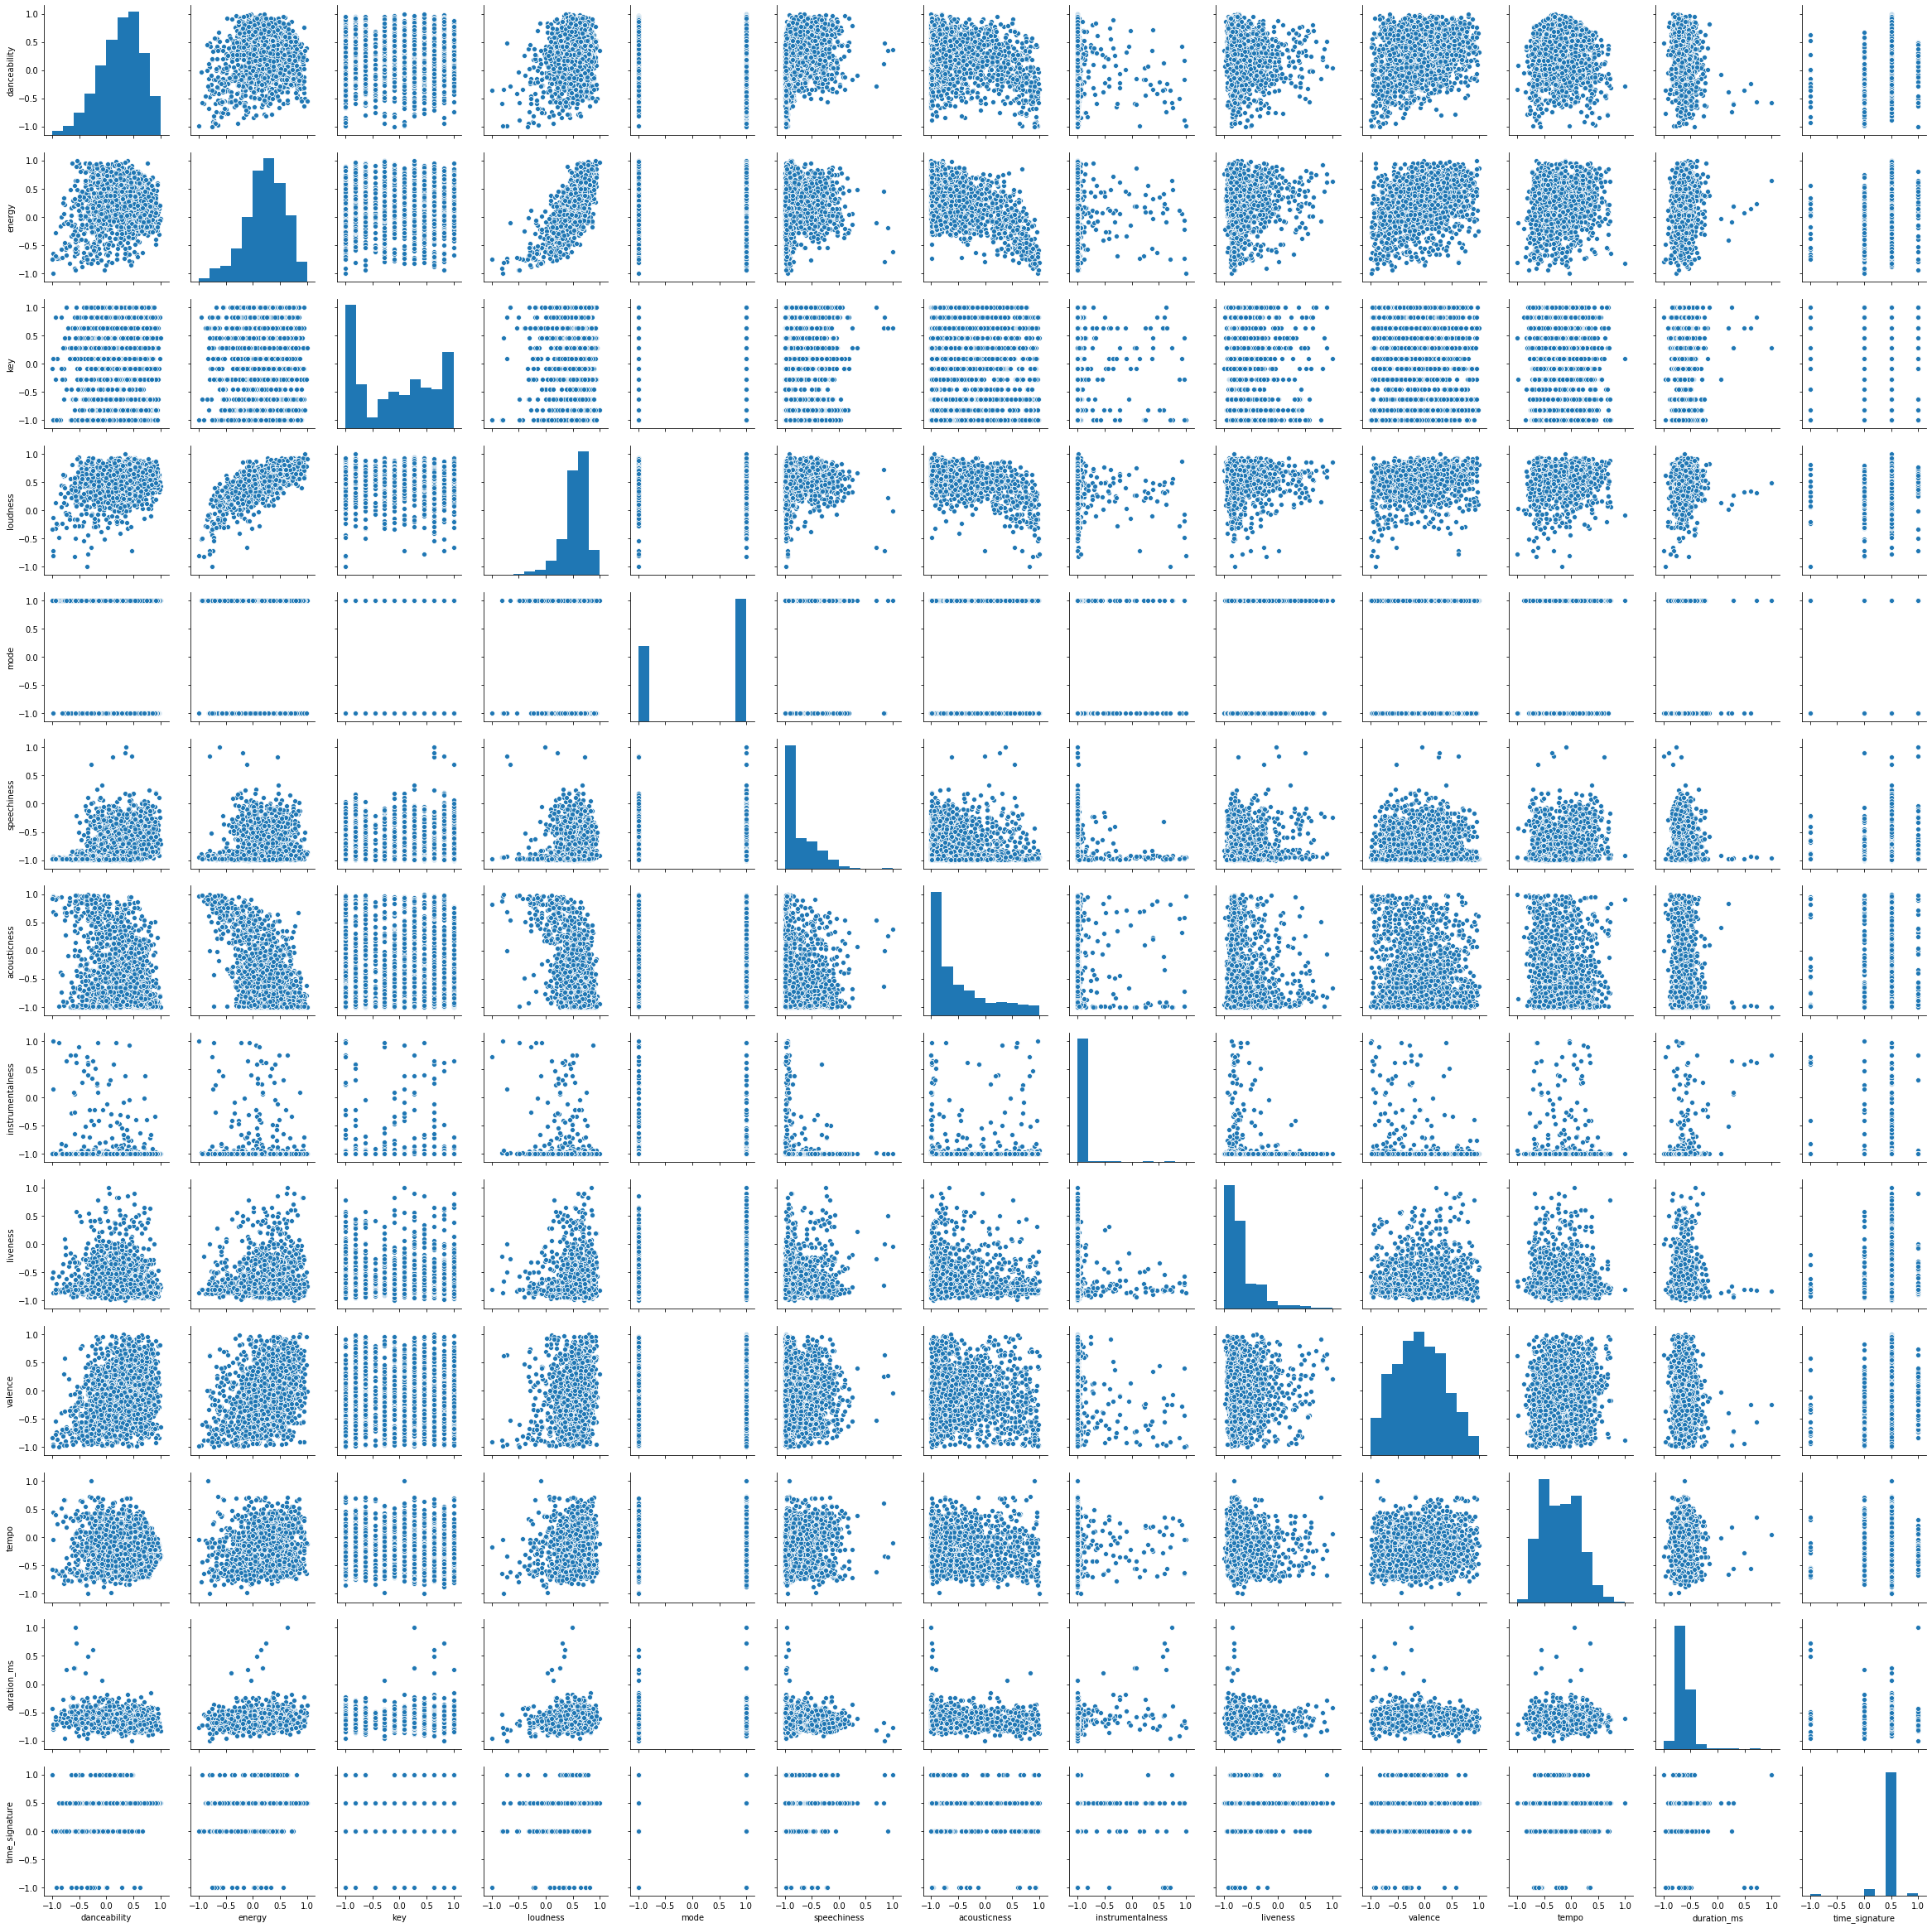

In [21]:
sns.pairplot(songs_ft_mmscl)

(13.0, 0.0)

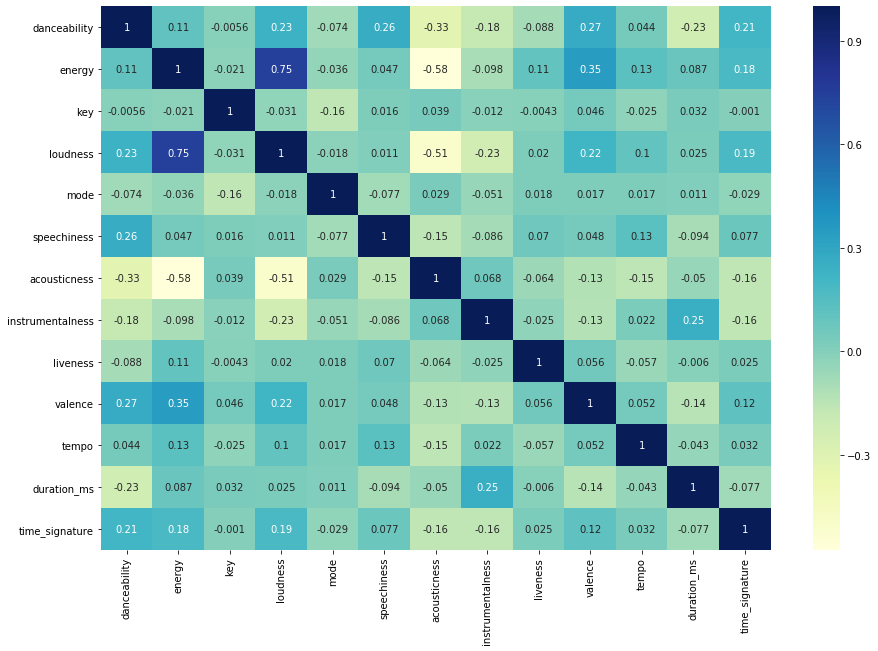

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(songs_ft_mmscl.corr(),annot=True, ax=ax, cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

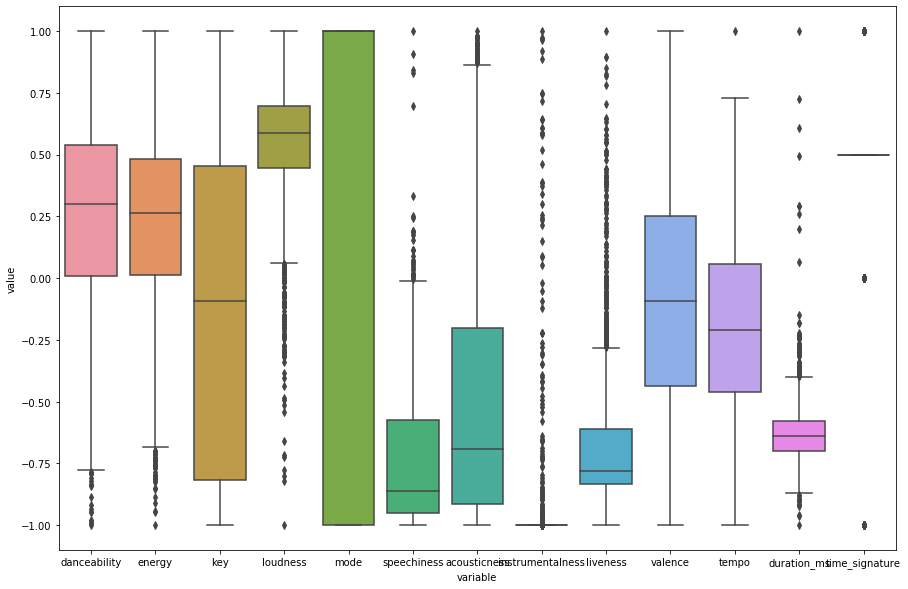

In [23]:
fig, ax = plt.subplots(figsize=(15,10))
plot_songs_ft_mmscl=pd.melt(songs_ft_mmscl)
sns.boxplot(x='variable',y='value',data = plot_songs_ft_mmscl)

In [24]:
songs_ft_mmscl.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

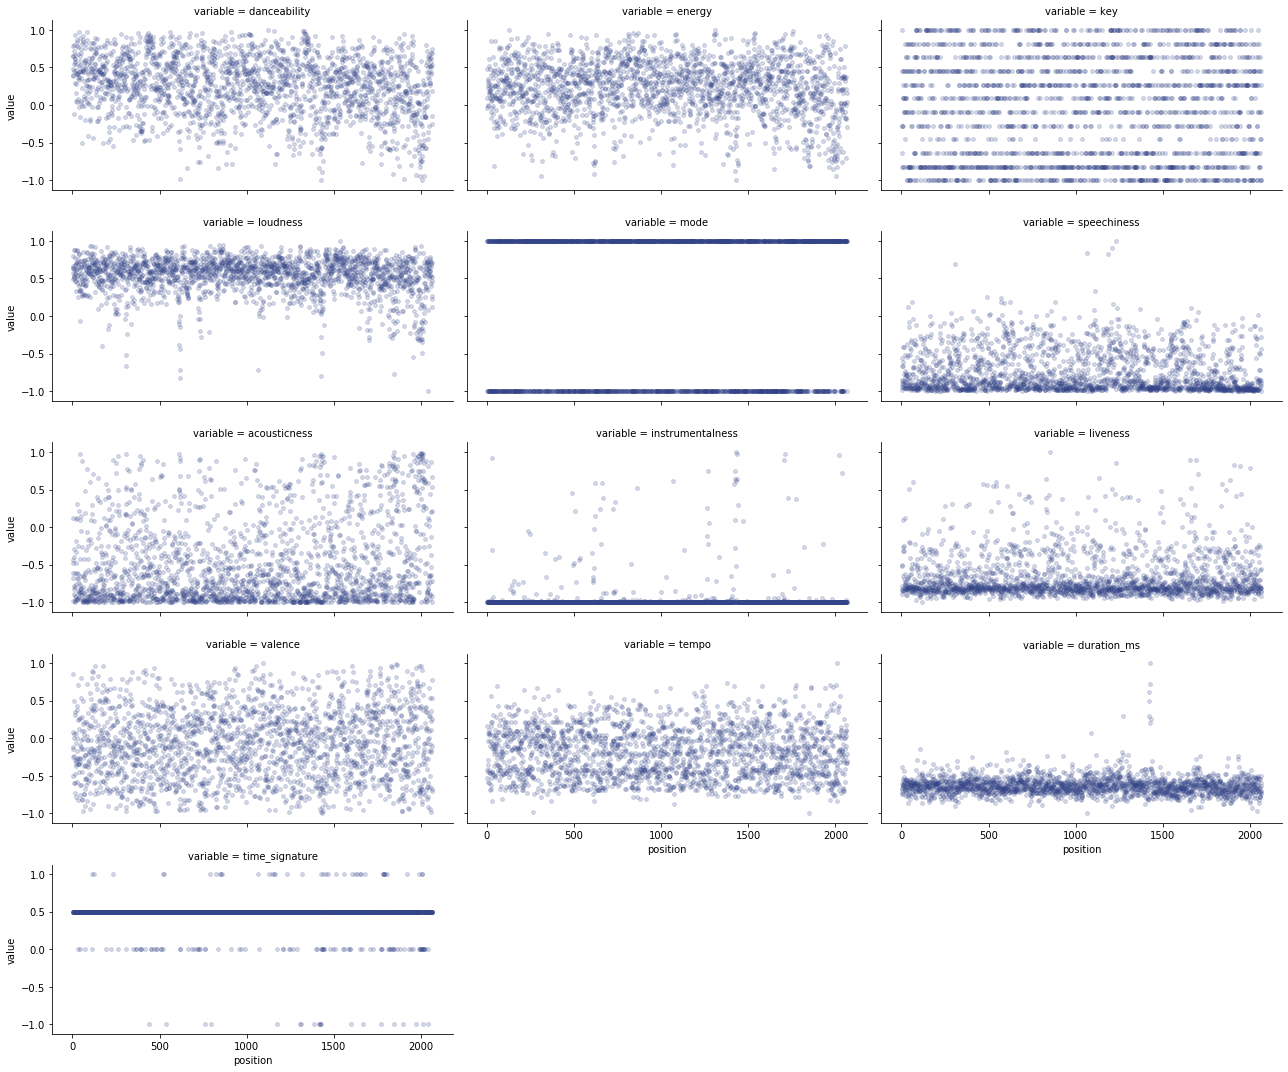

In [25]:
plot2_songs_ft_mmscl=songs_ft_mmscl.copy()
plot2_songs_ft_mmscl['position'] = plot2_songs_ft_mmscl.index +1
plot2_songs_ft_mmscl= pd.melt(plot2_songs_ft_mmscl,id_vars=['position'])
g=sns.FacetGrid(plot2_songs_ft_mmscl,col='variable',col_wrap=3, aspect=2)
g=g.map(plt.scatter,'position', 'value',color = "#334488", alpha=0.2,s=15)

## Cluster K-means

In [26]:
from sklearn.cluster import KMeans

### Choose number of clusters

Text(0, 0.5, 'WCSS')

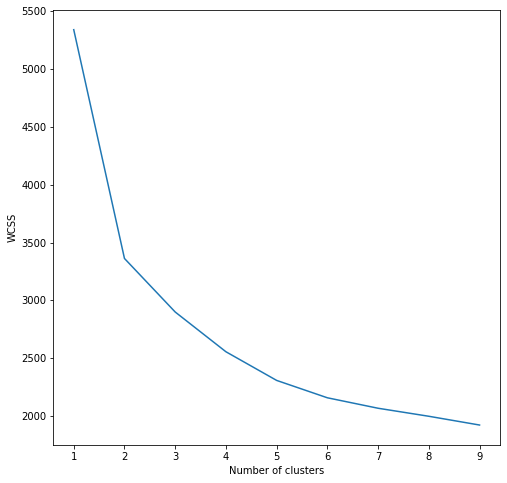

In [27]:
wcss =[]
for i in range(1,10):
    kmeanss = KMeans(i)
    kmeanss.fit(songs_ft_mmscl)
    wcss.append(kmeanss.inertia_)
fig, ax = plt.subplots(figsize=(8,8))
elbow=plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [28]:
np.random.seed(123)
kmeans = KMeans(n_clusters=5,random_state=123)
kmeans.fit(songs_ft_mmscl)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [29]:
np.random.seed(123)
clusters=songs_ft_mmscl.copy()
clusters['clusters']=kmeans.fit_predict(songs_ft_mmscl)

In [30]:
clusters.head()

danceability   energy      key  loudness     mode  speechiness  \
0       0.47470 -0.03495 -0.63636   0.64452  1.00000     -0.94792   
1       0.65060  0.08949  1.00000   0.49133 -1.00000     -0.65916   
2       0.65301  0.48564  0.45455   0.80065  1.00000     -0.56247   
3       0.38795  0.31349 -0.81818   0.63881  1.00000     -0.90572   
4       0.78554  0.00031 -0.27273   0.57813 -1.00000     -0.85144   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0       0.11868          -1.00000  -0.89634  0.85562 -0.53549     -0.72025   
1      -0.67210          -1.00000  -0.83112 -0.24922 -0.42756     -0.73891   
2      -0.98975          -1.00000  -0.78226 -0.12157  0.16458     -0.38127   
3      -0.43667          -1.00000  -0.82900 -0.14459 -0.35214     -0.61229   
4      -0.47893          -1.00000  -0.51036  0.08349 -0.57752     -0.67101   

   time_signature  clusters  
0         0.50000         2  
1         0.50000         3  
2         0.50000         0  
3         0.50000         2  
4         0.50000         1

In [31]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_,columns=songs_ft_mmscl.columns)
cluster_centers['clusters']=cluster_centers.index+1

In [32]:
cluster_centers

danceability   energy      key  loudness     mode  speechiness  \
0       0.29017  0.30763  0.45012   0.59030  1.00000     -0.73970   
1       0.28526  0.23064 -0.47692   0.54836 -1.00000     -0.72340   
2       0.32291  0.34463 -0.76277   0.61091  1.00000     -0.72000   
3       0.31728  0.26568  0.63775   0.55677 -1.00000     -0.69327   
4      -0.10629 -0.32361 -0.06808   0.22043  0.96413     -0.87235   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0      -0.65168          -0.97991  -0.64628  0.00936 -0.18838     -0.62126   
1      -0.46881          -0.94663  -0.68667 -0.14758 -0.21283     -0.63932   
2      -0.69769          -0.97736  -0.65261 -0.05893 -0.14545     -0.63175   
3      -0.54952          -0.96410  -0.65866 -0.02493 -0.18383     -0.62061   
4       0.52185          -0.93182  -0.72362 -0.32613 -0.28873     -0.63761   

   time_signature  clusters  
0         0.48596         1  
1         0.47949         2  
2         0.48000         3  
3         0.48223         4  
4         0.38789         5

In [33]:
cluster_centers.dtypes

danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
time_signature      float64
clusters              int64
dtype: object

In [34]:
plot_cluster_centers= pd.melt(cluster_centers,id_vars=['clusters'])

In [35]:
px.line(plot_cluster_centers,'variable','value', color='clusters')


In [36]:
px.line_polar(data_frame=plot_cluster_centers,r='value',theta='variable',color='clusters',
              line_close=True,range_r=[-1.5,1])

In [56]:
fig=go.Figure()
x1='danceability'
y1='energy'
fig.add_trace(go.Scatter(x=clusters[clusters['clusters']==0][x1], y=clusters[clusters['clusters']==0][y1],
                    mode='markers',name='cluster 1',marker=dict(color="#636EFA")))
fig.add_trace(go.Scatter(x=clusters[clusters['clusters']==1][x1], y=clusters[clusters['clusters']==1][y1],
                    mode='markers',name='cluster 2',marker=dict(color="#EF553B")))
fig.add_trace(go.Scatter(x=clusters[clusters['clusters']==2][x1], y=clusters[clusters['clusters']==2][y1],
                    mode='markers',name='cluster 3',marker=dict(color="#00CC96")))
fig.add_trace(go.Scatter(x=clusters[clusters['clusters']==3][x1], y=clusters[clusters['clusters']==3][y1],
                    mode='markers',name='cluster 4',marker=dict(color="#AB63FA")))
fig.add_trace(go.Scatter(x=clusters[clusters['clusters']==4][x1], y=clusters[clusters['clusters']==4][y1],
                    mode='markers',name='cluster 5',marker=dict(color="#FFA15A")))

## Join Songs with clusters & Total Streams per song

In [38]:
songs1=songs_ft_mmscl.copy()
songs1['clusters']=kmeans.fit_predict(songs_ft_mmscl)
songs1['id']=songs['id']
songs1['clusters']=songs1['clusters']+1

In [39]:
df=pd.merge(tsid,songs1,how='left', on='id')

In [40]:
df.head()

id    Streams  danceability   energy      key  \
0  2JvzF1RMd7lE3KmFlsyZD8  277363026       0.66024 -0.27346  0.45455   
1  3KkXRkHbMCARz0aVfEt68P  275441659       0.47470 -0.03495 -0.63636   
2  2Fxmhks0bxGSBdJ92vM42m  266302864       0.33253 -0.14695  0.27273   
3  2IRZnDFmlqMuOrYOLnZZyc  242595435       0.78554  0.00031 -0.27273   
4  6MWtB6iiXyIwun0YzU6DFP  240255598       0.65060  0.08949  1.00000   

   loudness     mode  speechiness  acousticness  instrumentalness  liveness  \
0   0.12922  1.00000     -0.44380      -0.70027          -1.00000  -0.46999   
1   0.64452  1.00000     -0.94792       0.11868          -1.00000  -0.89634   
2   0.19201  1.00000     -0.22624      -0.34009          -0.72803  -0.83324   
3   0.57813 -1.00000     -0.85144      -0.47893          -1.00000  -0.51036   
4   0.49133 -1.00000     -0.65916      -0.67210          -1.00000  -0.83112   

   valence    tempo  duration_ms  time_signature  clusters  
0 -0.08600 -0.16906     -0.59858         0.50000         1  
1  0.85562 -0.53549     -0.72025         0.50000         3  
2  0.12116 -0.04921     -0.64130         0.50000         1  
3  0.08349 -0.57752     -0.67101         0.50000         2  
4 -0.24922 -0.42756     -0.73891         0.50000         4

In [48]:
plot_df=df.copy()
plot_df=df.drop(['id','Streams'],axis=1)
plot_df['idn']=df.index+1
plot_df=pd.melt(plot_df,id_vars=['idn','clusters'])

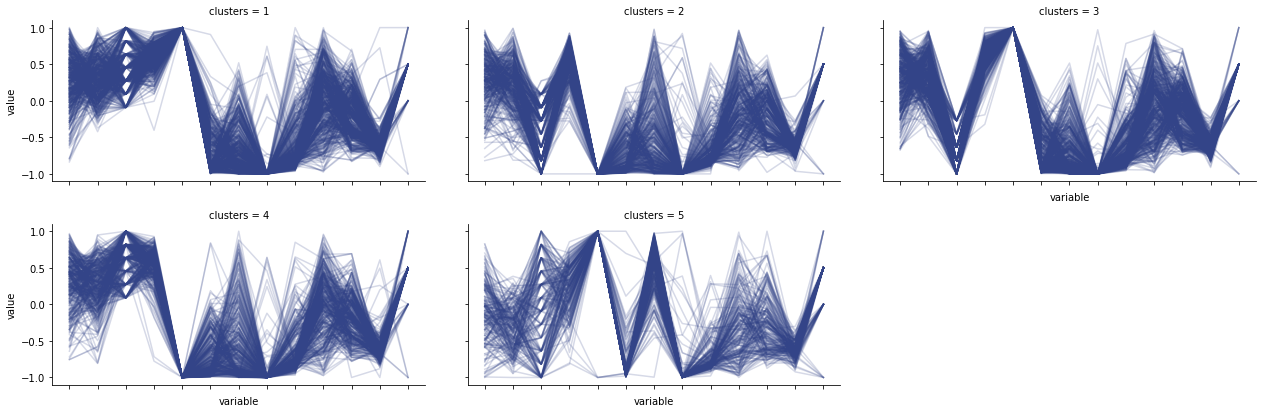

In [42]:
g=sns.FacetGrid(plot_df,col='clusters',col_wrap=3, hue='idn',aspect=2)
g.map(sns.lineplot,'variable', 'value',color = "#334488" ,alpha=0.2,sort=False)
g.set_xticklabels(rotation=30)

In [43]:
plot3_df=df.groupby('clusters').count().reset_index()
px.bar(plot3_df,x='clusters',y='Streams')


In [44]:
plot2_df=df.groupby('clusters').sum().reset_index()
px.bar(plot2_df,x='clusters',y='Streams')

In [45]:
df2=df.copy()
songs3=songs[['id','Artist','Track']]
df2=pd.merge(df,songs3,'left',on='id')

In [46]:
df3=df2.groupby('Artist').sum().reset_index().sort_values('Streams',ascending=False)
df3=df3.head(20)
px.bar(df3,x='Artist',y='Streams',color='Artist')

In [47]:
px.bar(df2,x='clusters',y='Streams',color='Artist',hover_data=['Track'])

## Conclusions

After analysing all the clusters differences and cross visualize them with total streams per song and per artist, I can say that top selling artist try to mix their songs styles so they can reach all kind of fans's preferences in music features. Since streaming is the new way of selling music, music albums are a mix of genres and styles, well, also the term of music album is becoming obsolete.